# Credit Card Dataset

## Summary

### 1. Data Inspection

1.1. Packages

1.2. Loading data

1.3. Variables distribution

1.4. Class distribution

### 2. Feature selection

2.1. Alicia

### 3. Data Preparation

3.1. Normalizing variable amount

3.2 Drop desnomalized variable amount

3.3. Split dataset

### 4. Define Metrics

4.1. Confusion Matrix

4.2. Recall, Precision and F1_score

4.3. Precision - Recall Curve

4.4. ROC Curve

4.5. Define (X , y) and Stratifed K-folds

### 5. Logistic Regression (LOG)

5.1. LOG - Without hyperparameters tuning

5.2. LOG - Grid Search CV to optimise F1 score

5.3. LOG - With best hyperparameters

### 6. Extreme Gradient Boosting (XGB)

6.1. XGB - Without hyperparameters tuning

6.2. XGB - plot learning curve

6.3. XGB - Grid Search CV to find best n_estimators (F1_score)

6.4. XGB - With best hyperparameters

6.5. Fit model using each importance as a threshold

    6.5.1 Using XGB Feature Selection 
    
    6.5.2 Using Alicia Feature Selection 
    

## 1. Data Inspection

### 1.1. Packages

In [1]:
# Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import warnings

/opt/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 1.2. Loading data

In [2]:
data = pd.read_csv('./dataset/creditcard.csv')

In [3]:
warnings.filterwarnings('ignore') #ignore warning messages 

### 1.3. Variables distribution

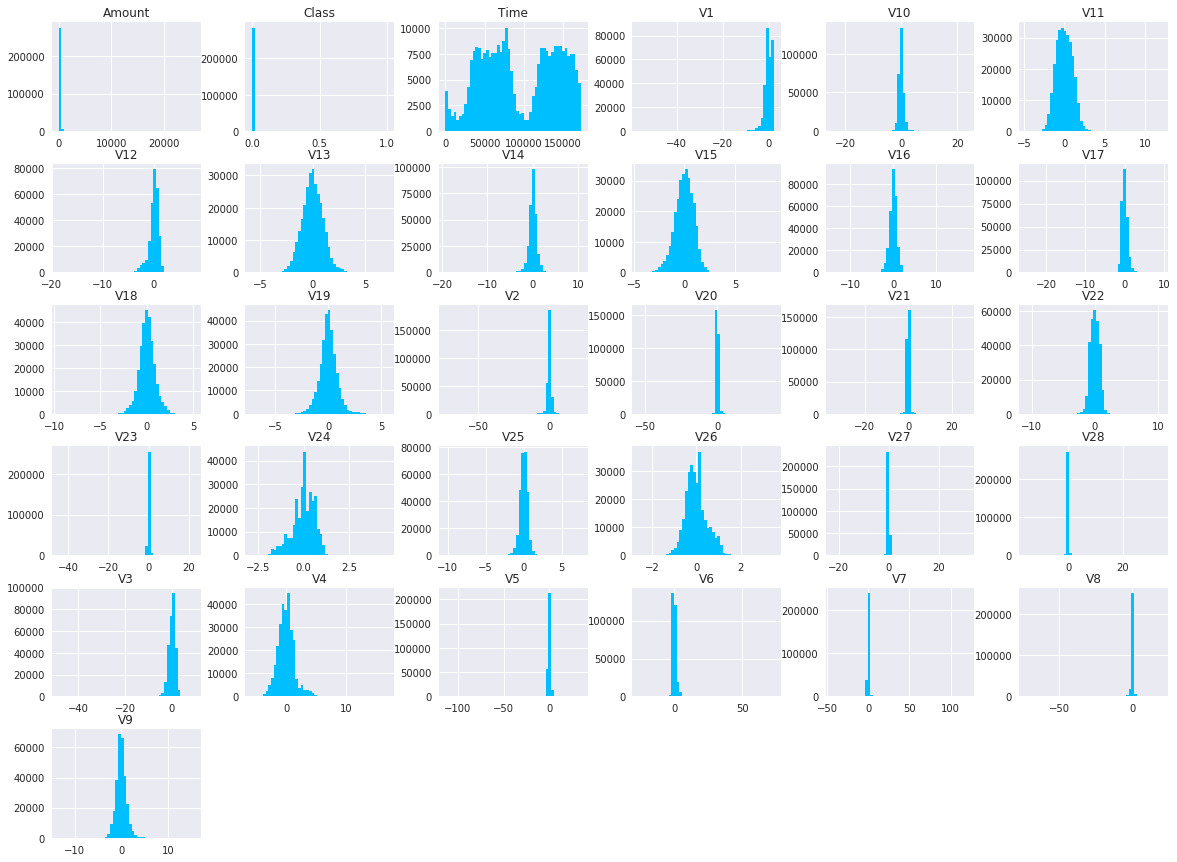

In [4]:
# Graph distribution
data.hist (bins=50, figsize=(20,15), color = 'deepskyblue')

plt.show()

In [4]:
# Describe dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.shape

(284807, 31)

### 1.4. Class distribution

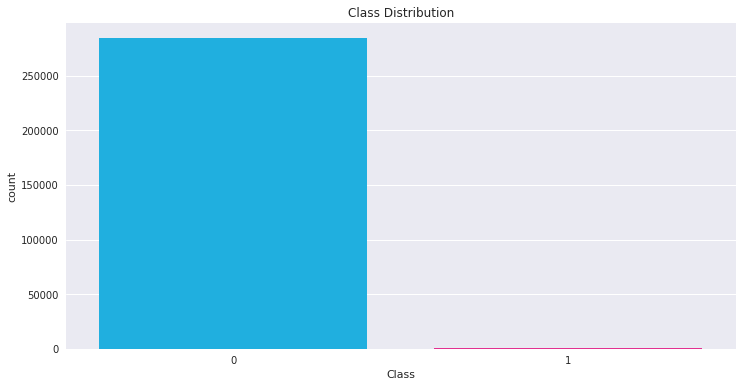

% of normal transacation       : 99.82725143693798
Number of normal transaction   : 284315
% of fraud transacation        : 0.1727485630620034
Number of fraud transaction    : 492


In [7]:
#Graph
my_pal = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'Class', data = data, palette = my_pal)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_Normal_transacation = len(data[data['Class']==0])
Count_Fraud_transacation = len(data[data['Class']==1]) 
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of normal transacation       :', Percentage_of_Normal_transacation*100)
print('Number of normal transaction   :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of fraud transacation        :',Percentage_of_Fraud_transacation*100)
print('Number of fraud transaction    :', Count_Fraud_transacation)

This is an unbalanced class

## 2. Feature selection

### 2.1. ALICIA

Features importance from Alicia

       attr_importance
Time       2.307420372
V1         0.317189486
V3         0.214069166
V28        0.169187664
V24        0.079363019
V11        0.077570233
V12        0.074907665
V25        0.074724239
V26        0.065221297
V4         0.059071330
V15        0.053708932
V22        0.051374769
V14        0.050452735
V5         0.050008611
V23        0.043584711
V13        0.034349910
V9         0.033205057
V21        0.033108693
V10        0.032774941
V7         0.024893432
Amount     0.023905167
V8         0.022326869
V6         0.018593703
V20        0.016602328
V17        0.016253432
V27        0.015937173
V2         0.011150454
V18        0.010418128
V19        0.010169908
V16        0.005554041

 [1] "Time"   "V1"     "V3"     "V28"    "V24"    "V11"    "V12"    "V25"    "V26"   
[10] "V4"     "V15"    "V22"    "V14"    "V5"     "V23"    "V13"    "V9"     "V21"   
[19] "V10"    "V7"     "Amount" "V8"     "V6"     "V20"    "V17"    "V27"    "V2"    
[28] "V18"    "V19"    "V16"

*******

## 3. Data Preparation

### 3.1. Normalizing variable amount

In [6]:
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

### 3.2 Drop desnomalized variable amount

In [7]:
data_norm = data.drop(['Amount'],axis=1)

### 3.3. Split dataset

In [8]:
# Cut in 2 datasets, one for training & test (cross validation), other for validation
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split (data_norm, test_size = 0.1, random_state = 42)

In [9]:
train_set.shape

(256326, 31)

In [10]:
test_set.shape

(28481, 31)

## 4. Define Metrics

### 4.1. Confusion Matrix

In [11]:
# confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### 4.2. Recall, Precision and F1_score

In [89]:
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.4f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.4f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.4f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

### 4.3. Precision - Recall Curve

In [90]:
# precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

### 4.4. ROC Curve

In [91]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

### 4.5. Define (X , y) and Stratifed K-folds

In [15]:
# def X and Y
y = np.array(data_norm.Class.tolist())
data_no_class = data_norm.drop('Class', 1)
X = np.array(data_no_class.as_matrix())

In [16]:
# Stratified k-folds
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
for train_index, test_index in skf.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

In [17]:
X_train.shape

(227846, 30)

In [19]:
X_test.shape

(56961, 30)

## 5. Logistic Regression (LOG)

### 5.1. LOG - Without hyperparameters tuning

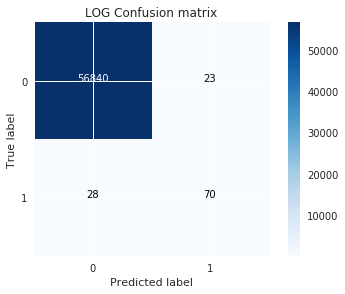

Precision =     0.753
Recall    =     0.714
F1_score  =     0.733


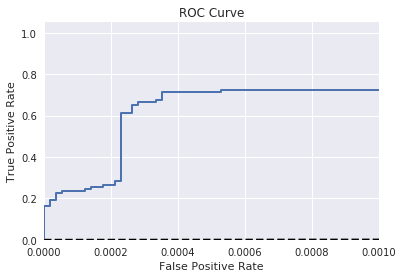

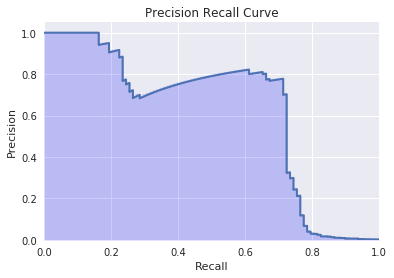

In [21]:
# Logistic regression 
log_cfl = LogisticRegression()

log_cfl.fit(X_train, y_train)
y_pred = log_cfl.predict(X_test)
y_score = log_cfl.decision_function(X_test)  

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'LOG Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

In [22]:
# Show parameters currently use
from pprint import pprint
print('Parameters currently in use:\n')
pprint(log_cfl.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


### 5.2. LOG - Grid Search CV to optimise F1 Score

In [23]:
# Find the best parameters : f1 optimisation
from sklearn.model_selection import GridSearchCV
param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }

CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'f1', verbose = 1, n_jobs = -1)
CV_log_cfl.fit(X_train, y_train)

best_parameters = CV_log_cfl.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 10.3min finished


The best parameters for using this model is {'C': 1, 'class_weight': None, 'penalty': 'l1'}


### 5.3. LOG - With best hyperparameters

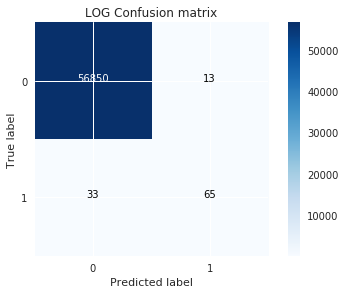

Precision =     0.833
Recall    =     0.663
F1_score  =     0.739


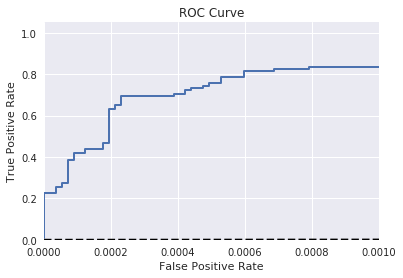

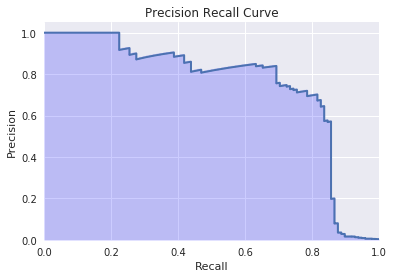

In [24]:
#Logistic regression with the best parameters
log_cfl = LogisticRegression(C = best_parameters['C'], 
                             penalty = best_parameters['penalty'], 
                             class_weight = best_parameters['class_weight'])

log_cfl.fit(X_train, y_train)
y_pred = log_cfl.predict(X_test)
y_score = log_cfl.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='LOG Confusion matrix')

#plt.savefig('5.log_cfl_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_log, tpr_log, t_log = fpr, tpr, t
precision_log, recall_log, thresholds_log = precision, recall, thresholds

## 6. Extreme Gradient Boosting (XGB)

### 6.1. XGB - Without hyperparameters tuning

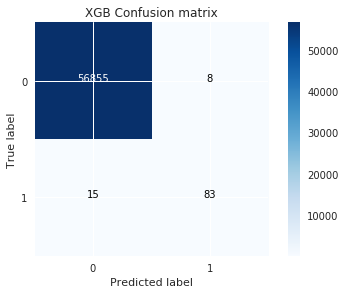

Precision =     0.912
Recall    =     0.847
F1_score  =     0.878


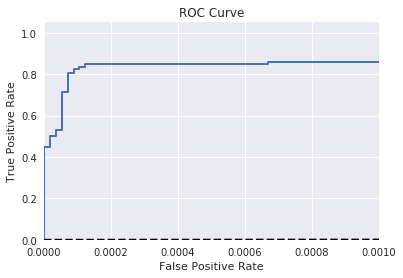

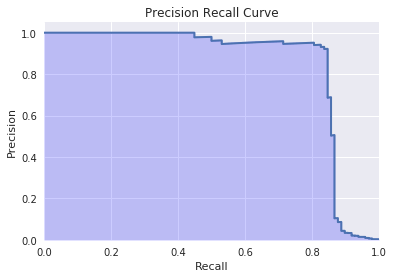

In [25]:
# xgb
#xgb_cfl = xgb.XGBClassifier(n_jobs = -1)
xgb_cfl = xgb.XGBClassifier()

eval_set = [(X_train, y_train), (X_test, y_test)]

xgb_cfl.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)
y_pred = xgb_cfl.predict(X_test)
y_score = xgb_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='XGB Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

### 6.2. XGB - plot learning curve

Lets use retrieve performance metrics from XGB model. 

In [24]:
from matplotlib import pyplot

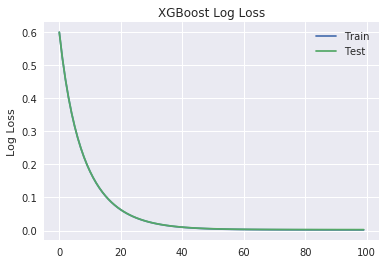

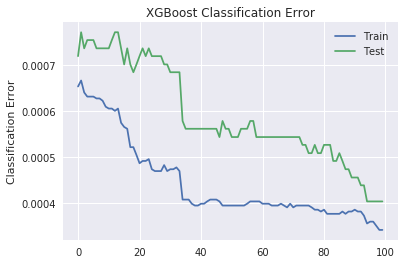

In [28]:
# retrieve performance metrics
results = xgb_cfl.evals_result()

epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [29]:
print('Parameters currently in use:\n')
pprint(xgb_cfl.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': -1,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'silent': True,
 'subsample': 1}


### 6.3. XGB - Grid Search CV to find best n_estimators (F1_score) 

Grid search CV is really slow, you can add or remove some hyperparameters (or use early_stop) :

In [30]:
param_grid = {
            'n_estimators': [400,500],
            'max_depth': [6,7,8],
            'learning_rate': [0.05,0.1],
            'min_child_weight': [1,10], #tuning min_child_weight subsample colsample_bytree for fighting against overfit
            'seed': [100] #ensemble xgboost with multiple seeds may reduce variance
              }

In [33]:
CV_xgb_cfl = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, n_jobs=5, scoring ='f1', verbose = 2)
CV_xgb_cfl.fit(X_train, y_train)

best_parameters = CV_xgb_cfl.best_params_
print("The best parameters for using this model is", best_parameters)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=400, seed=100 
[CV] learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=400, seed=100 
[CV] learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=400, seed=100 
[CV] learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=500, seed=100 
[CV] learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=500, seed=100 
[CV]  learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=400, seed=100, total= 8.3min
[CV] learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=500, seed=100 
[CV]  learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=400, seed=100, total= 8.4min
[CV] learning_rate=0.05, max_depth=6, min_child_weight=10, n_estimators=400, seed=100 
[CV]  learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=400, seed=100, total= 9.4min
[CV] learning_rate=0.05, max_dept

[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 56.7min


[CV]  learning_rate=0.05, max_depth=8, min_child_weight=10, n_estimators=400, seed=100, total= 5.9min
[CV] learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=400, seed=100 
[CV]  learning_rate=0.05, max_depth=8, min_child_weight=10, n_estimators=400, seed=100, total= 5.4min
[CV] learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=400, seed=100 
[CV]  learning_rate=0.05, max_depth=8, min_child_weight=10, n_estimators=500, seed=100, total= 7.1min
[CV] learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=400, seed=100 
[CV]  learning_rate=0.05, max_depth=8, min_child_weight=10, n_estimators=500, seed=100, total= 7.1min
[CV] learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=500, seed=100 
[CV]  learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=400, seed=100, total= 7.5min
[CV] learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=500, seed=100 
[CV]  learning_rate=0.05, max_depth=8, min_child_weight=10, n_estim

[Parallel(n_jobs=5)]: Done  72 out of  72 | elapsed: 129.0min finished


The best parameters for using this model is {'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 400, 'seed': 100}


### 6.4. XGB - With best hyperparameters

In [34]:
xgb_cfl = xgb.XGBClassifier(n_estimators = best_parameters['n_estimators'], 
                            max_depth = best_parameters['max_depth'],
                            learning_rate = best_parameters['learning_rate'],
                            min_child_weight = best_parameters['min_child_weight'],
                            seed = best_parameters['seed'])

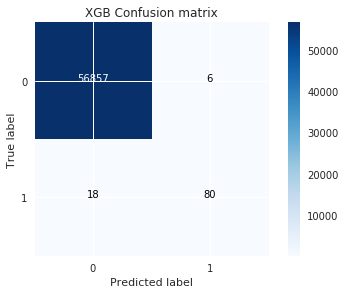

Precision =     0.930
Recall    =     0.816
F1_score  =     0.870


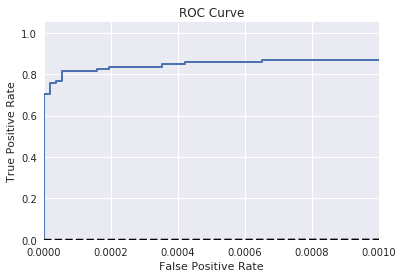

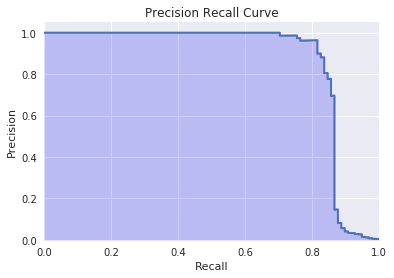

In [22]:
xgb_cfl.fit(X_train, y_train)
y_pred = xgb_cfl.predict(X_test)
y_score = xgb_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'XGB Confusion matrix')
#plt.savefig('2.xgb_cfl_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_xgb, tpr_xgb, t_xgb = fpr, tpr, t
precision_xgb, recall_xgb, thresholds_xgb = precision, recall, thresholds

### 6.5. Fit model using each importance as a threshold

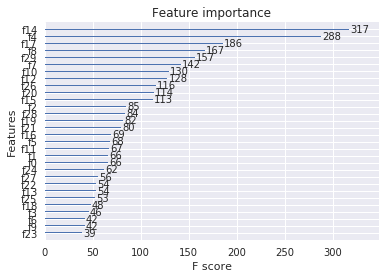

In [25]:
from xgboost import plot_importance

# plot feature importance
plot_importance(xgb_cfl,importance_type='weight')
pyplot.show()

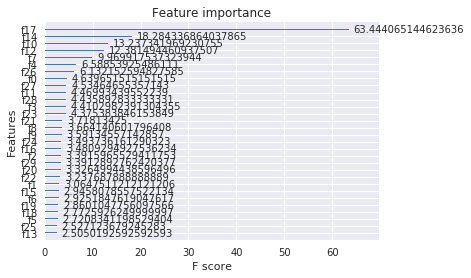

In [26]:
# plot feature importance
plot_importance(xgb_cfl,importance_type='gain')
pyplot.show()

[ 0.02184707  0.02184707  0.02813638  0.01522675  0.09533267  0.0225091
  0.01390268  0.0470043   0.05527971  0.01390268  0.04303211  0.02217809
  0.04237008  0.01787488  0.10493214  0.03740483  0.02284012  0.06156902
  0.01588878  0.02714333  0.03773585  0.0264813   0.01787488  0.01290963
  0.02052301  0.01754386  0.03839788  0.01853691  0.02780536  0.05196955]


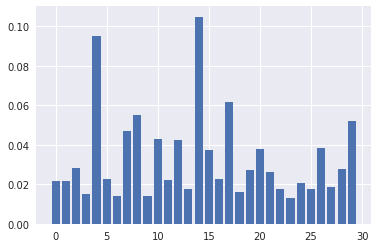

In [36]:
# feature importance
print(xgb_cfl.feature_importances_)
# plot
pyplot.bar(range(len(xgb_cfl.feature_importances_)), xgb_cfl.feature_importances_)
pyplot.show()

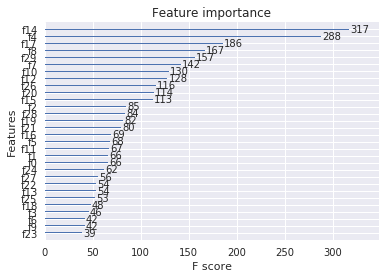

In [37]:
from xgboost import plot_importance

# plot feature importance
plot_importance(xgb_cfl)
pyplot.show()

### 6.5.1 Using XGB Feature Selection 

Using XGB, we have best results using 'xgb.XGBClassifier(n_estimators = 400)'.

In [109]:
from numpy import sort
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import time
import locale

In [111]:
### Using XGB feature importance 'weight'
thresholds = sort(xgb_cfl.feature_importances_)

In [112]:
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_cfl, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # calculate time
    start_time = time.time()
    # train model
    selection_model = xgb.XGBClassifier(n_estimators = 400)
    selection_model.fit(select_X_train, y_train)
    end_time = time.time()
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    
    print("-------- Thresh=%.3f, n=%d, %s seconds" % (thresh, select_X_train.shape[1], (time.time() - start_time)))
    cm = confusion_matrix(y_test, y_pred)
    show_metrics()

-------- Thresh=0.013, n=30, 120.84564805030823 seconds
Precision =     0.9419
Recall    =     0.8265
F1_score  =     0.8804
-------- Thresh=0.014, n=29, 114.52857232093811 seconds
Precision =     0.9318
Recall    =     0.8367
F1_score  =     0.8817
-------- Thresh=0.014, n=29, 117.78100657463074 seconds
Precision =     0.9318
Recall    =     0.8367
F1_score  =     0.8817
-------- Thresh=0.015, n=27, 88.51035594940186 seconds
Precision =     0.9310
Recall    =     0.8265
F1_score  =     0.8757
-------- Thresh=0.016, n=26, 111.52727818489075 seconds
Precision =     0.9302
Recall    =     0.8163
F1_score  =     0.8696
-------- Thresh=0.018, n=25, 90.41162347793579 seconds
Precision =     0.9310
Recall    =     0.8265
F1_score  =     0.8757
-------- Thresh=0.018, n=24, 97.86986207962036 seconds
Precision =     0.9310
Recall    =     0.8265
F1_score  =     0.8757
-------- Thresh=0.018, n=24, 88.8759229183197 seconds
Precision =     0.9310
Recall    =     0.8265
F1_score  =     0.8757
-----

### 6.5.2 Using Alicia Feature Selection 

In [121]:
alicia_features = ["V16", "V19", "V18", "V2", "V27", "V17", "V20", "V6", "V8",
                   "normAmount", "V7", "V10", "V21", "V9" , "V13", "V23", "V5" , "V14",
                   "V22","V15", "V4","V26", "V25" , "V12", "V11", "V24", "V28" ,
                   "V3", "V1", "Time"]

In [124]:
# remove feature 'Amount' because we normalize it into normAmount (3.1. Normalizing variable amount)

data_alicia = data.drop(['Amount'],axis=1) 

for thresh in alicia_features:
    
    # def X and Y
    y_alicia = np.array(data_alicia.Class.tolist())
    data_no_class_alicia = data_alicia.drop('Class', 1)
    X_alicia = np.array(data_no_class_alicia.as_matrix())
    
    # Stratified k-folds
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
    for train_index, test_index in skf.split(X_alicia, y_alicia):
        X_train_alicia, y_train_alicia = X_alicia[train_index], y_alicia[train_index]
        X_test_alicia, y_test_alicia = X_alicia[test_index], y_alicia[test_index]
    
    # Train model, using best parameters
    start_time = time.time()
    xgb_cfl_alicia = xgb.XGBClassifier(n_estimators = 400)
    xgb_cfl_alicia.fit(X_train_alicia, y_train_alicia)
    end_time = time.time()

    # eval model
    y_pred_alicia = xgb_cfl_alicia.predict(X_test_alicia)

    print("------------------ remove=%s, n=%d, %s seconds" % (thresh, X_train_alicia.shape[1], (time.time() - start_time)))
    cm = confusion_matrix(y_test_alicia, y_pred_alicia)
    show_metrics()
    
    # Remove feature
    data_alicia = data_alicia.drop(thresh,axis=1)

------------------ remove=V16, n=30, 111.70118856430054 seconds
Precision =     0.9419
Recall    =     0.8265
F1_score  =     0.8804
------------------ remove=V19, n=29, 107.32452487945557 seconds
Precision =     0.9412
Recall    =     0.8163
F1_score  =     0.8743
------------------ remove=V18, n=28, 104.1713228225708 seconds
Precision =     0.9425
Recall    =     0.8367
F1_score  =     0.8865
------------------ remove=V2, n=27, 99.74449300765991 seconds
Precision =     0.9425
Recall    =     0.8367
F1_score  =     0.8865
------------------ remove=V27, n=26, 98.16175198554993 seconds
Precision =     0.9425
Recall    =     0.8367
F1_score  =     0.8865
------------------ remove=V17, n=25, 91.04463505744934 seconds
Precision =     0.9535
Recall    =     0.8367
F1_score  =     0.8913
------------------ remove=V20, n=24, 88.85808968544006 seconds
Precision =     0.9375
Recall    =     0.7653
F1_score  =     0.8427
------------------ remove=V6, n=23, 86.9401113986969 seconds
Precision =   